In [1]:
"""
@author: Runyao Yu
runyao.yu@danfoss.com
"""

import os
import pandas as pd
import pygal
from IPython.display import SVG, display
import plotly.express as px

In [9]:
def data_preprocessing(data):
    #rules can be found in VoltageProbes.csv
    new = pd.DataFrame()
    new["HS_Vgs_Module"] = data[":U1.HS_G_in             "] - data[":U1.LS_D_Pin            "]
    new["HS_Vds_Module"] = data[":U1.HS_D_Pin            "] - data[":U1.LS_D_Pin            "]
    new["HS_Vgs_T1"] =     data[":U1.HS_G_T1             "] - data[":U1.HS_S_T1             "]
    new["HS_Vgs_T2"] =     data[":U1.HS_G_T2             "] - data[":U1.HS_S_T2             "]
    new["HS_Vgs_T3"] =     data[":U1.HS_G_T3             "] - data[":U1.HS_S_T3             "]
    new["HS_Vgs_T4"] =     data[":U1.HS_G_T4             "] - data[":U1.HS_S_T4             "]
    new["HS_Vds_T1"] =     data[":U1.HS_D_T1             "] - data[":U1.HS_S_T1             "]
    new["HS_Vds_T2"] =     data[":U1.HS_D_T2             "] - data[":U1.HS_S_T2             "]
    new["HS_Vds_T3"] =     data[":U1.HS_D_T3             "] - data[":U1.HS_S_T3             "]
    new["HS_Vds_T4"] =     data[":U1.HS_D_T4             "] - data[":U1.HS_S_T4             "]

    new["LS_Vgs_Module"] = data[":U1.LS_G_in             "] - data[":U1.LS_S_Pin            "]
    new["LS_Vds_Module"] = data[":U1.LS_D_Pin            "] - data[":U1.LS_S_Pin            "]
    new["LS_Vgs_T5"] =     data[":U1.LS_G_T5             "] - data[":U1.LS_S_T5             "]
    new["LS_Vgs_T6"] =     data[":U1.LS_G_T6             "] - data[":U1.LS_S_T6             "]
    new["LS_Vgs_T7"] =     data[":U1.LS_G_T7             "] - data[":U1.LS_S_T7             "]
    new["LS_Vgs_T8"] =     data[":U1.LS_G_T8             "] - data[":U1.LS_S_T8             "]
    new["LS_Vds_T5"] =     data[":U1.LS_D_T5             "] - data[":U1.LS_S_T5             "]
    new["LS_Vds_T6"] =     data[":U1.LS_D_T6             "] - data[":U1.LS_S_T6             "]
    new["LS_Vds_T7"] =     data[":U1.LS_D_T7             "] - data[":U1.LS_S_T7             "]
    new["LS_Vds_T8"] =     data[":U1.LS_D_T8             "] - data[":U1.LS_S_T8             "]

    #差模T1-T2 共模(T1+T2)/2
    new["HS_Vgs_abs_T1-T2"] = abs(new["HS_Vgs_T1"] - new["HS_Vgs_T2"])
    new["HS_Vgs_abs_T1-T3"] = abs(new["HS_Vgs_T1"] - new["HS_Vgs_T3"])
    new["HS_Vgs_abs_T1-T4"] = abs(new["HS_Vgs_T1"] - new["HS_Vgs_T4"])
    new["HS_Vgs_abs_T2-T3"] = abs(new["HS_Vgs_T2"] - new["HS_Vgs_T3"])
    new["HS_Vgs_abs_T2-T4"] = abs(new["HS_Vgs_T2"] - new["HS_Vgs_T4"])
    new["HS_Vgs_abs_T3-T4"] = abs(new["HS_Vgs_T3"] - new["HS_Vgs_T4"])
    
    max_HS_Vgs_T1T2 = max(new["HS_Vgs_abs_T1-T2"])
    max_HS_Vgs_T1T3 = max(new["HS_Vgs_abs_T1-T3"])
    max_HS_Vgs_T1T4 = max(new["HS_Vgs_abs_T1-T4"])
    max_HS_Vgs_T2T3 = max(new["HS_Vgs_abs_T2-T3"])
    max_HS_Vgs_T2T4 = max(new["HS_Vgs_abs_T2-T4"])
    max_HS_Vgs_T3T4 = max(new["HS_Vgs_abs_T3-T4"])
    
    new["LS_Vgs_abs_T5-T6"] = abs(new["LS_Vgs_T5"] - new["LS_Vgs_T6"])
    new["LS_Vgs_abs_T5-T7"] = abs(new["LS_Vgs_T5"] - new["LS_Vgs_T7"])
    new["LS_Vgs_abs_T5-T8"] = abs(new["LS_Vgs_T5"] - new["LS_Vgs_T8"])
    new["LS_Vgs_abs_T6-T7"] = abs(new["LS_Vgs_T6"] - new["LS_Vgs_T7"])
    new["LS_Vgs_abs_T6-T8"] = abs(new["LS_Vgs_T6"] - new["LS_Vgs_T8"])
    new["LS_Vgs_abs_T7-T8"] = abs(new["LS_Vgs_T7"] - new["LS_Vgs_T8"])

    max_LS_Vgs_T5T6 = max(new["LS_Vgs_abs_T5-T6"])
    max_LS_Vgs_T5T7 = max(new["LS_Vgs_abs_T5-T7"])
    max_LS_Vgs_T5T8 = max(new["LS_Vgs_abs_T5-T8"])
    max_LS_Vgs_T6T7 = max(new["LS_Vgs_abs_T6-T7"])
    max_LS_Vgs_T6T8 = max(new["LS_Vgs_abs_T6-T8"])
    max_LS_Vgs_T7T8 = max(new["LS_Vgs_abs_T7-T8"])
    return new, max_HS_Vgs_T1T2, max_HS_Vgs_T1T3, max_HS_Vgs_T1T4, max_HS_Vgs_T2T3, max_HS_Vgs_T2T4, max_HS_Vgs_T3T4, max_LS_Vgs_T5T6, max_LS_Vgs_T5T7, max_LS_Vgs_T5T8, max_LS_Vgs_T6T7, max_LS_Vgs_T6T8, max_LS_Vgs_T7T8


def dataframe_formation(INDEX, MAX_HS_Vgs_T1T2, MAX_HS_Vgs_T1T3, MAX_HS_Vgs_T1T4, MAX_HS_Vgs_T2T3, MAX_HS_Vgs_T2T4, MAX_HS_Vgs_T3T4, 
                        MAX_LS_Vgs_T5T6, MAX_LS_Vgs_T5T7, MAX_LS_Vgs_T5T8, MAX_LS_Vgs_T6T7, MAX_LS_Vgs_T6T8, MAX_LS_Vgs_T7T8, 
                        MAX_HS_Vgs, MIN_HS_Vgs, MAX_LS_Vgs, MIN_LS_Vgs, MAX_Vgs, MIN_Vgs,
                        INDEX_MAX_HS_Vgs, INDEX_MIN_HS_Vgs, INDEX_MAX_LS_Vgs, INDEX_MIN_LS_Vgs, INDEX_MAX_Vgs, INDEX_MIN_Vgs):
    
    df = pd.DataFrame({"MAX_HS_Vgs_T1T2": MAX_HS_Vgs_T1T2, "MAX_HS_Vgs_T1T3": MAX_HS_Vgs_T1T3, "MAX_HS_Vgs_T1T4": MAX_HS_Vgs_T1T4, "MAX_HS_Vgs_T2T3": MAX_HS_Vgs_T2T3, "MAX_HS_Vgs_T2T4": MAX_HS_Vgs_T2T4, "MAX_HS_Vgs_T3T4": MAX_HS_Vgs_T3T4, 
                       "MAX_LS_Vgs_T5T6": MAX_LS_Vgs_T5T6, "MAX_LS_Vgs_T5T7": MAX_LS_Vgs_T5T7, "MAX_LS_Vgs_T5T8": MAX_LS_Vgs_T5T8, "MAX_LS_Vgs_T6T7": MAX_LS_Vgs_T6T7, "MAX_LS_Vgs_T6T8": MAX_LS_Vgs_T6T8, "MAX_LS_Vgs_T7T8": MAX_LS_Vgs_T7T8,
                       "MAX_HS_Vgs": MAX_HS_Vgs, "INDEX_MAX_HS_Vgs": INDEX_MAX_HS_Vgs,
                       "MIN_HS_Vgs": MIN_HS_Vgs, "INDEX_MIN_HS_Vgs": INDEX_MIN_HS_Vgs, 
                       "MAX_LS_Vgs": MAX_LS_Vgs, "INDEX_MAX_LS_Vgs": INDEX_MAX_LS_Vgs,
                       "MIN_LS_Vgs": MIN_LS_Vgs, "INDEX_MIN_LS_Vgs": INDEX_MIN_LS_Vgs,
                       "MAX_Vgs": MAX_Vgs, "INDEX_MAX_Vgs": INDEX_MAX_Vgs,
                       "MIN_Vgs": MIN_Vgs, "INDEX_MIN_Vgs": INDEX_MIN_Vgs}, index = INDEX)
    df.sort_index(inplace=True)
    return df

In [11]:
MAX_HS_Vgs_T1T2, MAX_HS_Vgs_T1T3, MAX_HS_Vgs_T1T4, MAX_HS_Vgs_T2T3, MAX_HS_Vgs_T2T4, MAX_HS_Vgs_T3T4 = [], [], [], [], [], []
MAX_LS_Vgs_T5T6, MAX_LS_Vgs_T5T7, MAX_LS_Vgs_T5T8, MAX_LS_Vgs_T6T7, MAX_LS_Vgs_T6T8, MAX_LS_Vgs_T7T8 = [], [], [], [], [], []
INDEX = []

MAX_HS_Vgs = []
MIN_HS_Vgs = []

MAX_LS_Vgs = []
MIN_LS_Vgs = []

MAX_Vgs = []
MIN_Vgs = []

index_HS_Vgs = ["T1T2","T1T3","T1T4","T2T3","T2T4","T3T4"]
index_LS_Vgs = ["T5T6","T5T7","T5T8","T6T7","T6T8","T7T8"]
index_Vgs = ["T1T2","T1T3","T1T4","T2T3","T2T4","T3T4","T5T6","T5T7","T5T8","T6T7","T6T8","T7T8"]

INDEX_MAX_HS_Vgs = []
INDEX_MIN_HS_Vgs = []
INDEX_MAX_LS_Vgs = []
INDEX_MIN_LS_Vgs = []
INDEX_MAX_Vgs = []
INDEX_MIN_Vgs = []

for root, dirs, files in os.walk("C:/Runyao/Store"): 
    for name in files:
        path = os.path.join(root, name) 
        if "HSDUT_Voltage" in name: #HSDUT Voltage
            data = pd.read_csv(path, delimiter="\t", header = 0)
            #print(data.columns)
            index = path.rfind("HS_")
            #print('handsome boy is reading:', path[index:], '...')
            new, max_HS_Vgs_T1T2, max_HS_Vgs_T1T3, max_HS_Vgs_T1T4, max_HS_Vgs_T2T3, max_HS_Vgs_T2T4, max_HS_Vgs_T3T4, max_LS_Vgs_T5T6, max_LS_Vgs_T5T7, max_LS_Vgs_T5T8, max_LS_Vgs_T6T7, max_LS_Vgs_T6T8, max_LS_Vgs_T7T8 = data_preprocessing(data)
            #print(new.columns)
            MAX_HS_Vgs_T1T2.append(max_HS_Vgs_T1T2)
            MAX_HS_Vgs_T1T3.append(max_HS_Vgs_T1T3)
            MAX_HS_Vgs_T1T4.append(max_HS_Vgs_T1T4)
            MAX_HS_Vgs_T2T3.append(max_HS_Vgs_T2T3)
            MAX_HS_Vgs_T2T4.append(max_HS_Vgs_T2T4)
            MAX_HS_Vgs_T3T4.append(max_HS_Vgs_T3T4)

            MAX_LS_Vgs_T5T6.append(max_LS_Vgs_T5T6)
            MAX_LS_Vgs_T5T7.append(max_LS_Vgs_T5T7)
            MAX_LS_Vgs_T5T8.append(max_LS_Vgs_T5T8)
            MAX_LS_Vgs_T6T7.append(max_LS_Vgs_T6T7)
            MAX_LS_Vgs_T6T8.append(max_LS_Vgs_T6T8)
            MAX_LS_Vgs_T7T8.append(max_LS_Vgs_T7T8)
            
            TEMP_HS = [max_HS_Vgs_T1T2, max_HS_Vgs_T1T3, max_HS_Vgs_T1T4, max_HS_Vgs_T2T3, max_HS_Vgs_T2T4, max_HS_Vgs_T3T4]
            TEMP_LS = [max_LS_Vgs_T5T6, max_LS_Vgs_T5T7, max_LS_Vgs_T5T8, max_LS_Vgs_T6T7, max_LS_Vgs_T6T8, max_LS_Vgs_T7T8]
            TEMP = [max_HS_Vgs_T1T2, max_HS_Vgs_T1T3, max_HS_Vgs_T1T4, max_HS_Vgs_T2T3, max_HS_Vgs_T2T4, max_HS_Vgs_T3T4, max_LS_Vgs_T5T6, max_LS_Vgs_T5T7, max_LS_Vgs_T5T8, max_LS_Vgs_T6T7, max_LS_Vgs_T6T8, max_LS_Vgs_T7T8]
            
            MAX_HS_Vgs.append(max(TEMP_HS))
            INDEX_MAX_HS_Vgs.append(index_HS_Vgs[TEMP_HS.index(max(TEMP_HS))])
            MIN_HS_Vgs.append(min(TEMP_HS))
            INDEX_MIN_HS_Vgs.append(index_HS_Vgs[TEMP_HS.index(min(TEMP_HS))])
            
            MAX_LS_Vgs.append(max(TEMP_LS))
            INDEX_MAX_LS_Vgs.append(index_LS_Vgs[TEMP_LS.index(max(TEMP_LS))])
            MIN_LS_Vgs.append(min(TEMP_LS))
            INDEX_MIN_LS_Vgs.append(index_LS_Vgs[TEMP_LS.index(min(TEMP_LS))])
            
            MAX_Vgs.append(max(TEMP))
            INDEX_MAX_Vgs.append(index_Vgs[TEMP.index(max(TEMP))])
            MIN_Vgs.append(min(TEMP))
            INDEX_MIN_Vgs.append(index_Vgs[TEMP.index(min(TEMP))])
            
            index = path[index+3:len(path)-18]
            INDEX.append(int(index))
            #print(index)
            

print(MAX_HS_Vgs_T1T2)
print("\n")
print(INDEX)
print("\n")
df = dataframe_formation(INDEX, MAX_HS_Vgs_T1T2, MAX_HS_Vgs_T1T3, MAX_HS_Vgs_T1T4, MAX_HS_Vgs_T2T3, MAX_HS_Vgs_T2T4, MAX_HS_Vgs_T3T4, 
                        MAX_LS_Vgs_T5T6, MAX_LS_Vgs_T5T7, MAX_LS_Vgs_T5T8, MAX_LS_Vgs_T6T7, MAX_LS_Vgs_T6T8, MAX_LS_Vgs_T7T8, 
                        MAX_HS_Vgs, MIN_HS_Vgs, MAX_LS_Vgs, MIN_LS_Vgs, MAX_Vgs, MIN_Vgs,
                        INDEX_MAX_HS_Vgs, INDEX_MIN_HS_Vgs, INDEX_MAX_LS_Vgs, INDEX_MIN_LS_Vgs, INDEX_MAX_Vgs, INDEX_MIN_Vgs)
print(df.head())
df.to_csv("C:/Runyao/Max_Differential_Voltage_NEW.csv")

[1.5753774035775905, 1.4076565545917248, 1.5448602361858548, 1.516721304180777, 1.4735178264691626, 1.7724700997032414, 1.5033289926848, 1.7235275369667988, 2.151183305954845, 1.5188104343139628, 1.494942035064497, 1.4284258319104879, 1.4211575336360056, 1.6822722973842588, 1.3416170550872835, 1.470699397994025, 1.6311774991199286, 1.7502560023973501, 1.856428525147976, 1.3524446273649176, 1.5608266909494688, 1.7045144168623096, 1.3720390790576715, 1.7909419432860858, 1.4233113772920944, 1.576182389519218, 1.4310034510677667, 1.4625418311106841, 1.4083295780161507, 1.4524655168318645, 1.5910427537010605, 1.5494267609344519, 1.4693985241516714, 1.4693806404004874, 1.33970499399949, 1.52309744163216, 1.3306247203451846, 1.5138391721128528, 1.4408451890539027, 1.7569229054565767, 1.5163702725314465, 1.4181073627565866, 1.4146349151028517, 1.4956236630719815, 2.060621762289088, 1.460400051858187, 1.5178261803758346, 1.52385320069952, 1.438299497718674, 1.3460158897792525, 1.727762318016516

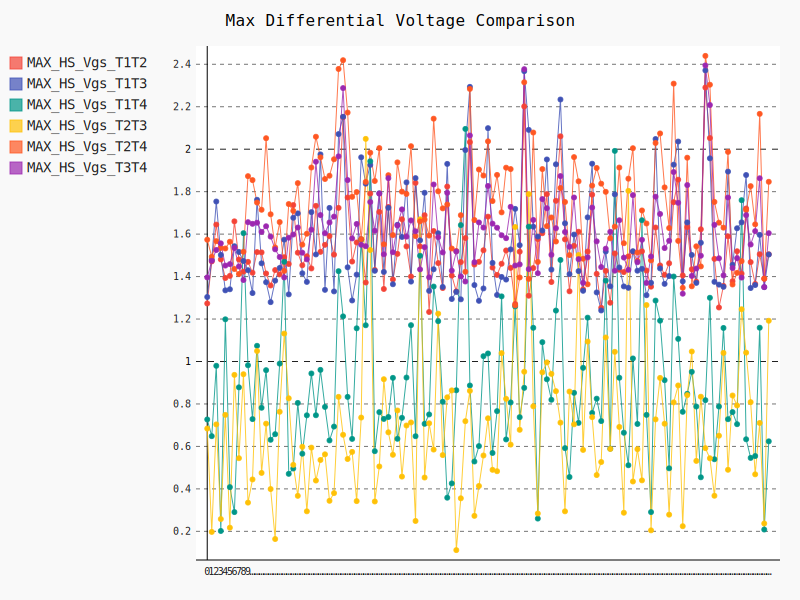

In [10]:
#MAX_HS_Vgs_T1T2, MAX_HS_Vgs_T1T3, MAX_HS_Vgs_T1T4, MAX_HS_Vgs_T2T3, MAX_HS_Vgs_T2T4, MAX_HS_Vgs_T3T4
line_chart = pygal.Line()
line_chart.title = "Max Differential Voltage Comparison"
line_chart.x_labels = map(str, range(0, 125))
line_chart.add("MAX_HS_Vgs_T1T2", MAX_HS_Vgs_T1T2)
line_chart.add("MAX_HS_Vgs_T1T3", MAX_HS_Vgs_T1T3)
line_chart.add("MAX_HS_Vgs_T1T4", MAX_HS_Vgs_T1T4)
line_chart.add("MAX_HS_Vgs_T2T3", MAX_HS_Vgs_T2T3)
line_chart.add("MAX_HS_Vgs_T2T4", MAX_HS_Vgs_T2T4)
line_chart.add("MAX_HS_Vgs_T3T4", MAX_HS_Vgs_T3T4)
line_chart.render_to_file('/Users/rampageyao/Desktop/丹佛斯工作/Comparison.svg') 
display(SVG(line_chart.render(disable_xml_declaration=True)))

In [41]:
def plot(df, str_col, col, str_ind, ind):
    x = list(range(125))
    dataframe = pd.DataFrame({"index":x, str_col: col.tolist(), str_ind: ind.tolist()})
    #fg = sns.FacetGrid(data=dataframe, hue=str_ind)
    #fg.map(plt.scatter, "index", str_col).add_legend()
    #plt.show()
    return dataframe

In [56]:
# for high side and low side
d = plot(df, "MAX_Vgs", df["MAX_Vgs"], "INDEX_MAX_Vgs", df["INDEX_MAX_Vgs"])
 
fig = px.bar(d, x="index", y="MAX_Vgs", color="INDEX_MAX_Vgs", barmode = 'group')
fig.show()
fig.write_html("/Users/rampageyao/Desktop/丹佛斯工作/Danfoss_Chips/MAX_Vgs.html")

In [57]:
# for high side and low side
d = plot(df, "MIN_Vgs", df["MIN_Vgs"], "INDEX_MIN_Vgs", df["INDEX_MIN_Vgs"])
 
fig = px.bar(d, x="index", y="MIN_Vgs", color="INDEX_MIN_Vgs", barmode = 'group')
fig.show()
fig.write_html("/Users/rampageyao/Desktop/丹佛斯工作/Danfoss_Chips/MIN_Vgs.html")